In [23]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import mygene
import anndata
import seaborn as sns

In [24]:
# load samples and their expression
data = pd.read_excel('iPSC_DESeq_JUL2015_all_merged_ensemble_DataLevel3.xlsx',index_col=0)

# load result from differential expression analysis (looks like DESeq2 result)
df = pd.read_csv('iPSC_DESeq_JUL2015_ALSvsCTR_median_DataLevel4.csv')

# select genes with abs(log2 FC) > alpha --> define this for each treatment
alpha = 1
sel = data[data.index.isin(df[abs(df['log2FoldChange'])>alpha]['Gene'])]

# subtract their mean expression 
for gene, mean in df[abs(df['log2FoldChange'])>alpha][['Gene','baseMean']].values:
    sel.loc[gene] = (sel.loc[gene]/mean)-1

C:\Users\melek\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:1758: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)
C:\Users\melek\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-24-87690006e001>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

In [25]:
# put gene names instead of ENSEMBL IDs
# for this first run : $ pip install mygene
adata = anndata.AnnData(sel.T)
mg = mygene.MyGeneInfo()
geneList = np.asarray(adata.var_names)
geneSyms = mg.querymany(geneList , scopes='ensembl.gene', fields='symbol', species='human')
geneIDs = list()
for i in range(len(adata.var_names)):
    if(len(geneSyms[i])==4):
        geneIDs.append(geneSyms[i]['symbol'])
    else:
        geneIDs.append(adata.var_names[i])
adata.var['names'] = geneIDs
adata.obs_names = sel.columns
adata.var_names = geneIDs

querying 1-27...done.
Finished.
1 input query terms found no hit:
	['ENSG00000235878']
Pass "returnall=True" to return complete lists of duplicate or missing query terms.


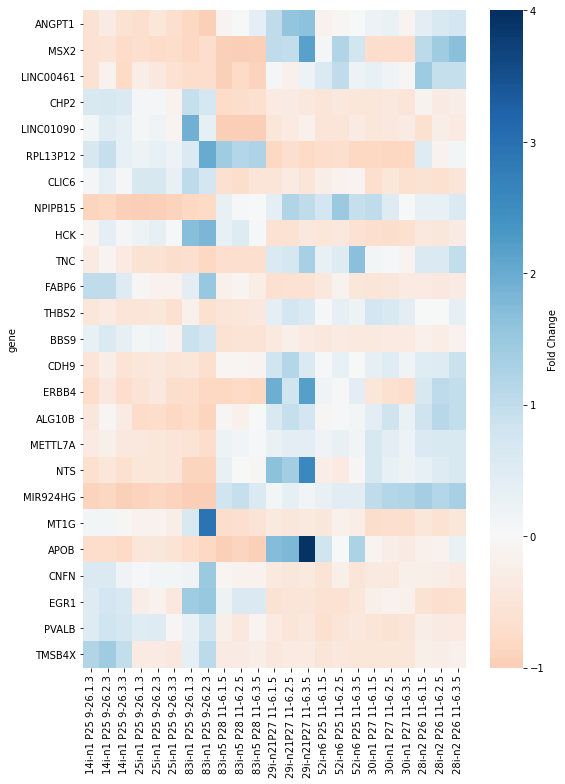

In [26]:
# plot heatmap
# remove ENSG genes

idx = ['ENSG' not in gene for gene in geneIDs]
fig = plt.figure(figsize=(8,11))
sns.heatmap(
            sel.iloc[idx,[0,1,2,3,4,5,6,7,26,27,28, # controls
            8,9,10,11,12,13,14,15,16,17,18,19]], # ALS
            center=0,vmin=-1,vmax=4,cmap='RdBu',
            yticklabels=np.array(geneIDs)[idx],
            cbar_kws={'label': 'Fold Change'})

plt.tight_layout()

#plt.savefig('heatmap.jpg',transparent=False)